In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import itertools
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

In [2]:
# Read data
data = pd.read_csv('creditcard.csv')
df = pd.DataFrame(data)

In [3]:
# Data Exploration and Visualization
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


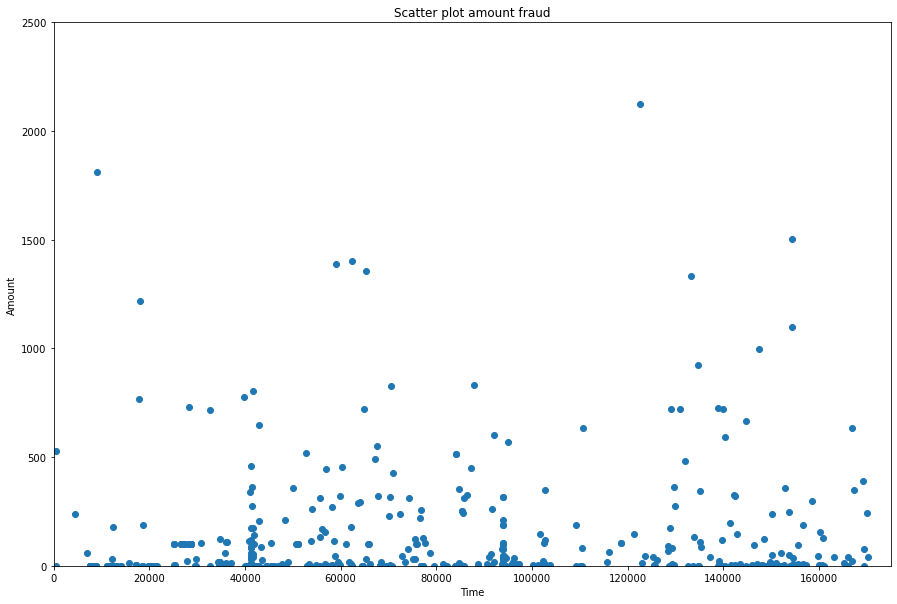

In [4]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15, 10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scatter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0, 175000])
plt.ylim([0, 2500])
plt.show()

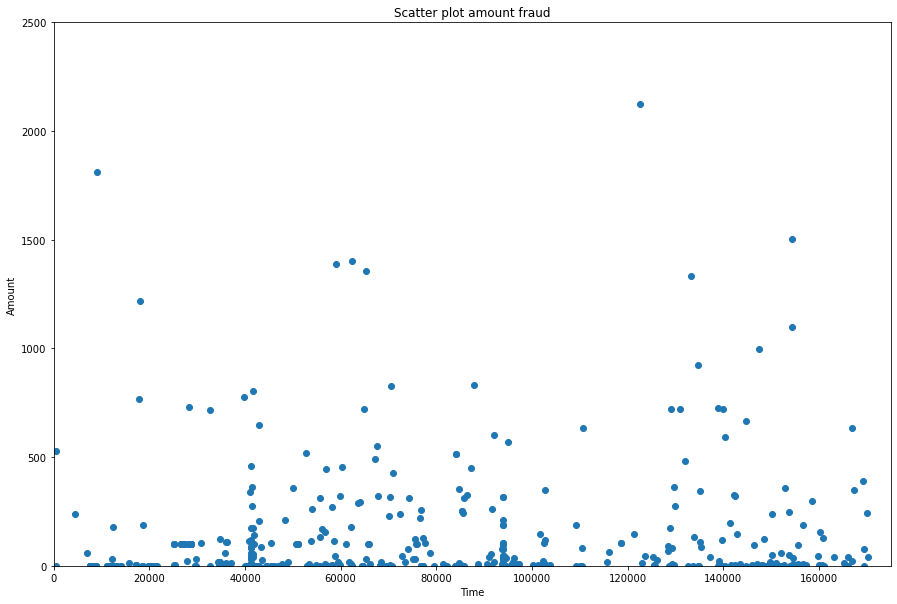

In [5]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15, 10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scatter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0, 175000])
plt.ylim([0, 2500])
plt.show()

In [6]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0]
print('There are only ' + str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over ' + str(
    df_fraud.shape[0]) + ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [7]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only ' + str(number_fraud) + ' frauds in the original dataset, even though there are ' + str(
    number_no_fraud) + ' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


In [8]:
# SVM Model
df_train_all = df[0:150000]
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have ' + str(len(df_train_1)) + " frauds so we need to take a similar number of non-fraud")

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [9]:
df_sample = df_train_0.sample(300)
df_train = df_train_1.append(df_sample)
df_train = df_train.sample(frac=1)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22496\4164784285.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train = df_train_1.append(df_sample)


In [10]:
X_train = df_train.drop(['Time', 'Class'], axis=1)
y_train = df_train['Class']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

df_test_all = df[150000:]
X_test_all = df_test_all.drop(['Time', 'Class'], axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [11]:
# SVM Classifier
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(X_train, y_train)
prediction_svm_all = classifier_svm.predict(X_test_all)

In [12]:
# Evaluate SVM
accuracy_svm_all = accuracy_score(y_test_all, prediction_svm_all)
print("Accuracy (SVM - Entire Test Dataset):", accuracy_svm_all)

Accuracy (SVM - Entire Test Dataset): 0.9480739130757305


In [13]:
# Random Forest Model
classifier_rf = RandomForestClassifier(n_estimators=100, random_state=42)
classifier_rf.fit(X_train, y_train)
prediction_rf_all = classifier_rf.predict(X_test_all)

In [14]:
# Evaluate Random Forest
accuracy_rf_all = accuracy_score(y_test_all, prediction_rf_all)
print("Accuracy (Random Forest - Entire Test Dataset):", accuracy_rf_all)

Accuracy (Random Forest - Entire Test Dataset): 0.9659290689652614
